## Method evaluation and sensitivity experiments diagnostics with MOMP

This notebook show examples of how to leverage the ROMP benchimarking tool to carry out evaluation of monsoon onset detection method and sensitivity diagnostics in forecast performance benchmarking. 

### Example 1. how does rainfall threholds affect monsoon onset detection?

In [5]:
from momp.lib.loader import get_cfg
from pathlib import Path
from IPython.display import Image, display

<br>

We investigate how sensitive of monsoon onset to wet spell duration   

the wet spell duration is set in the `wet_spell` parameter in `config.in`. it is 5 days by default  

we run the onset time series diagnostics app in CLI as

In [2]:
!python -m momp.app.onset_time_series

package base dir /Users/bodong/Code/benchmarking/momp

Processing year 2013
Loading observation rainfall from: /Users/bodong/Code/dev_tmp/4x4/obs/2013.nc
Using 06-02 as start date for onset detection
Figure(800x300)


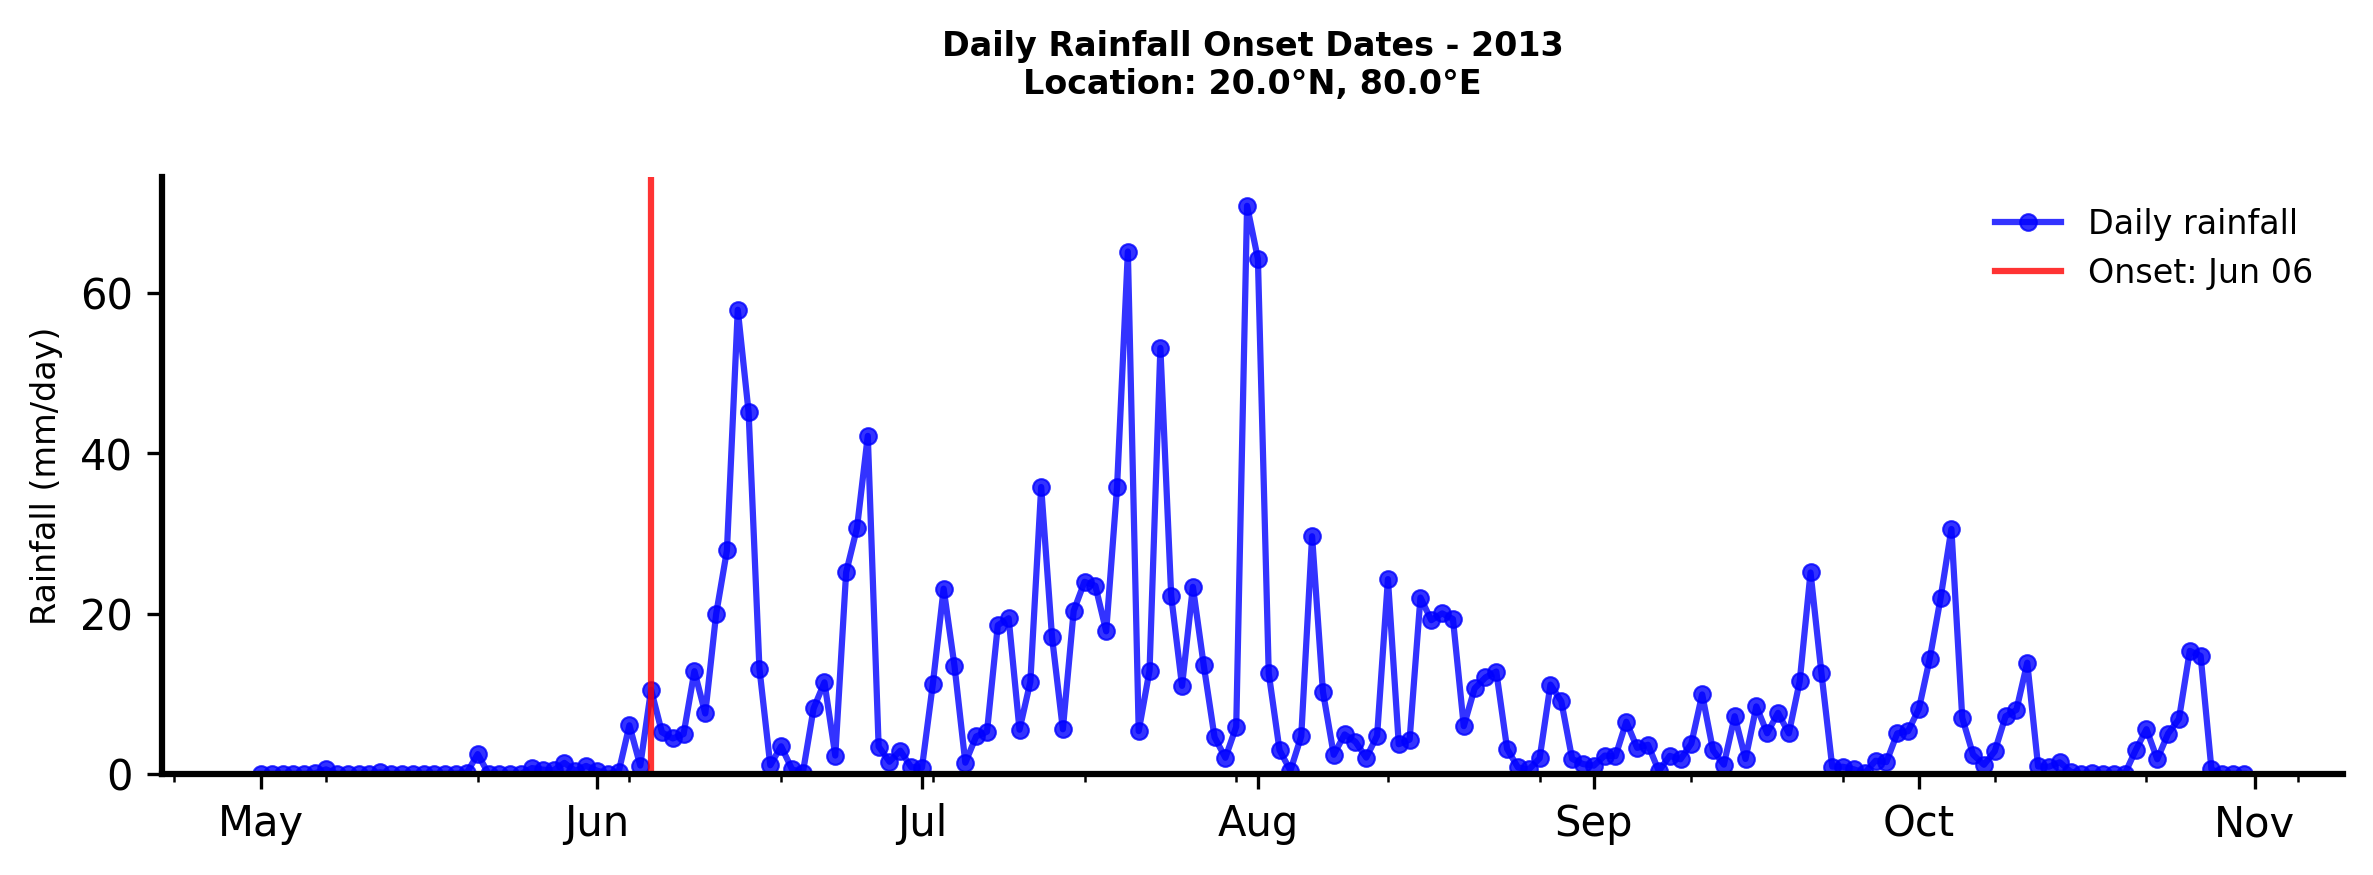

In [10]:
cfg = get_cfg()
base_dir = cfg.base_dir
dir_fig = Path(cfg.dir_fig)
fig_filename = base_dir.joinpath(dir_fig, 'onset_time_series.png')
display(Image(filename=fig_filename, width=600))

<br>

Now let's change the wet spell to 2 days

In [11]:
!python -m momp.app.onset_time_series --wet_spell 2

package base dir /Users/bodong/Code/benchmarking/momp

Processing year 2013
Loading observation rainfall from: /Users/bodong/Code/dev_tmp/4x4/obs/2013.nc
Using 06-02 as start date for onset detection
Figure(800x300)


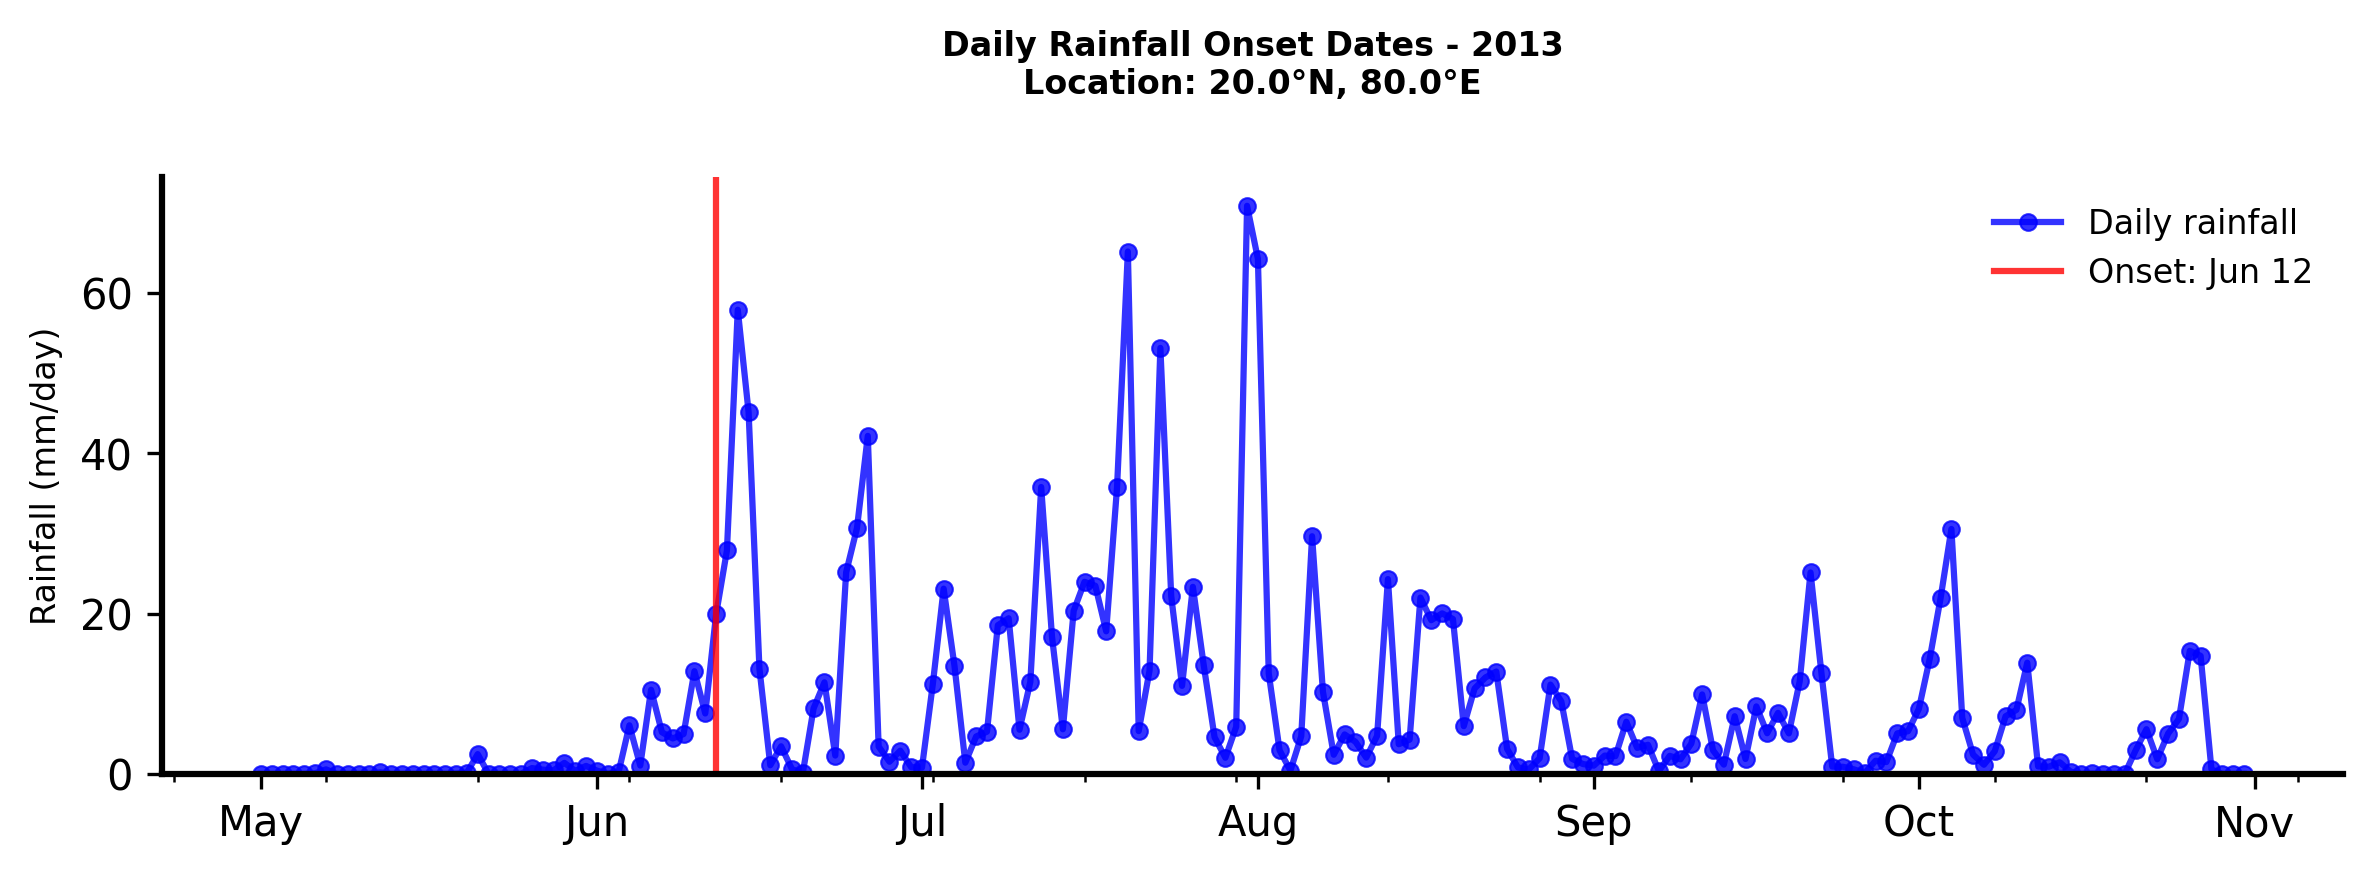

In [12]:
display(Image(filename=fig_filename, width=600))

<br>

we see that the onset days is delayed by 6 days, resulting from the wet spell duration change

<br>

### Example 2. spatiotemporal characteristics of model foreacst skill  
How do the model skill compare spatially?  
How do the model skill compare as lead time increases?

In [14]:
# model forecast data
model_dir = Path(cfg.model_dir_list[0])
model_name = cfg.model_list[0]
print("model = ", model_name)

model =  AIFS




forecast window  1-15 days 




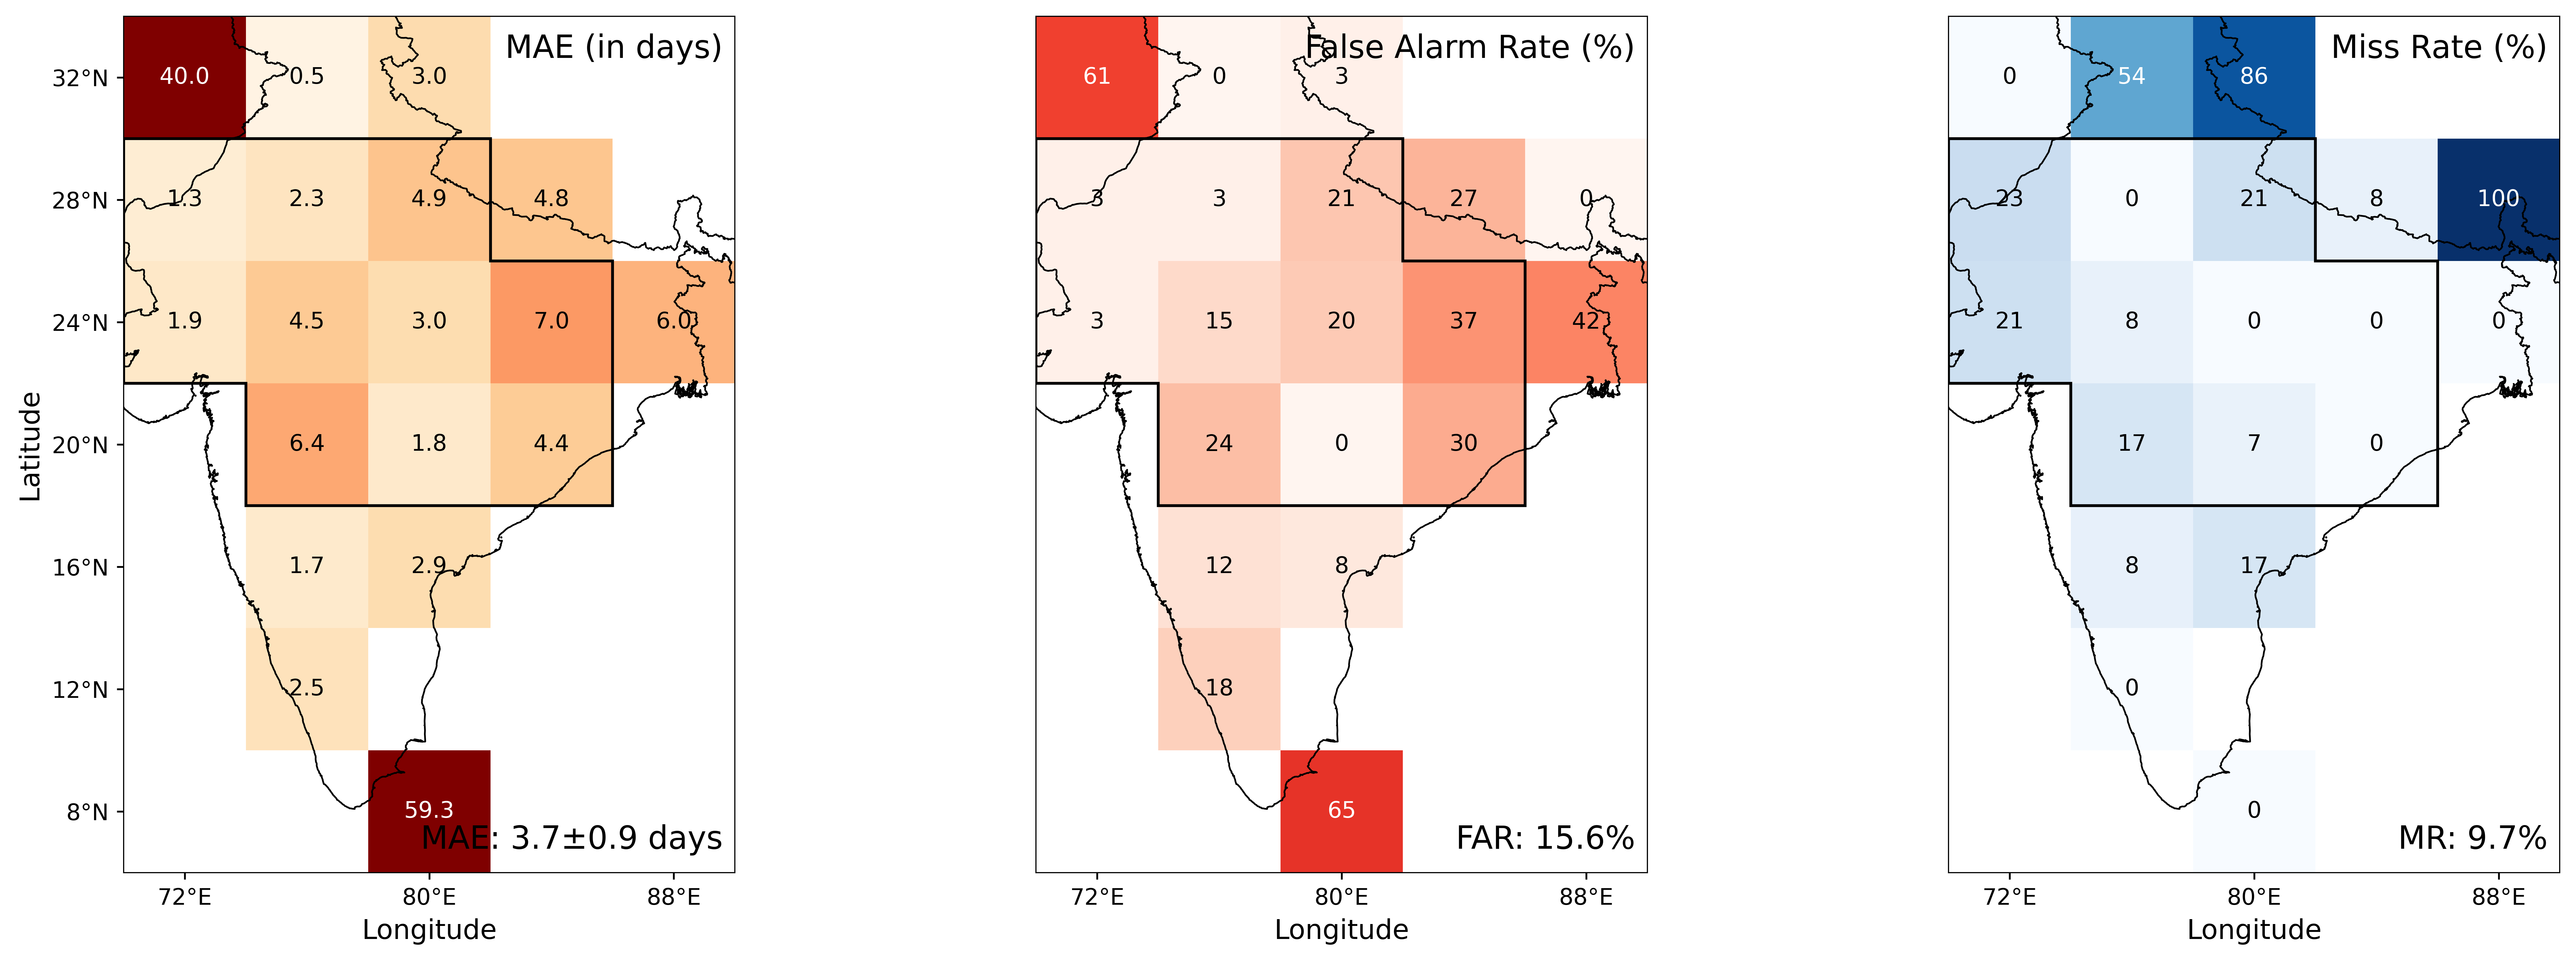

In [28]:
window = cfg.verification_window_list
print("\n\nforecast window ", "-".join(map(str, window[0])), "days \n\n")
fig_filename = base_dir.joinpath(dir_fig, f'spatial_metrics_{model_name}_{"-".join(map(str, window[0]))}.png')
display(Image(filename=fig_filename, width=800))



forecast window  16-20 days 




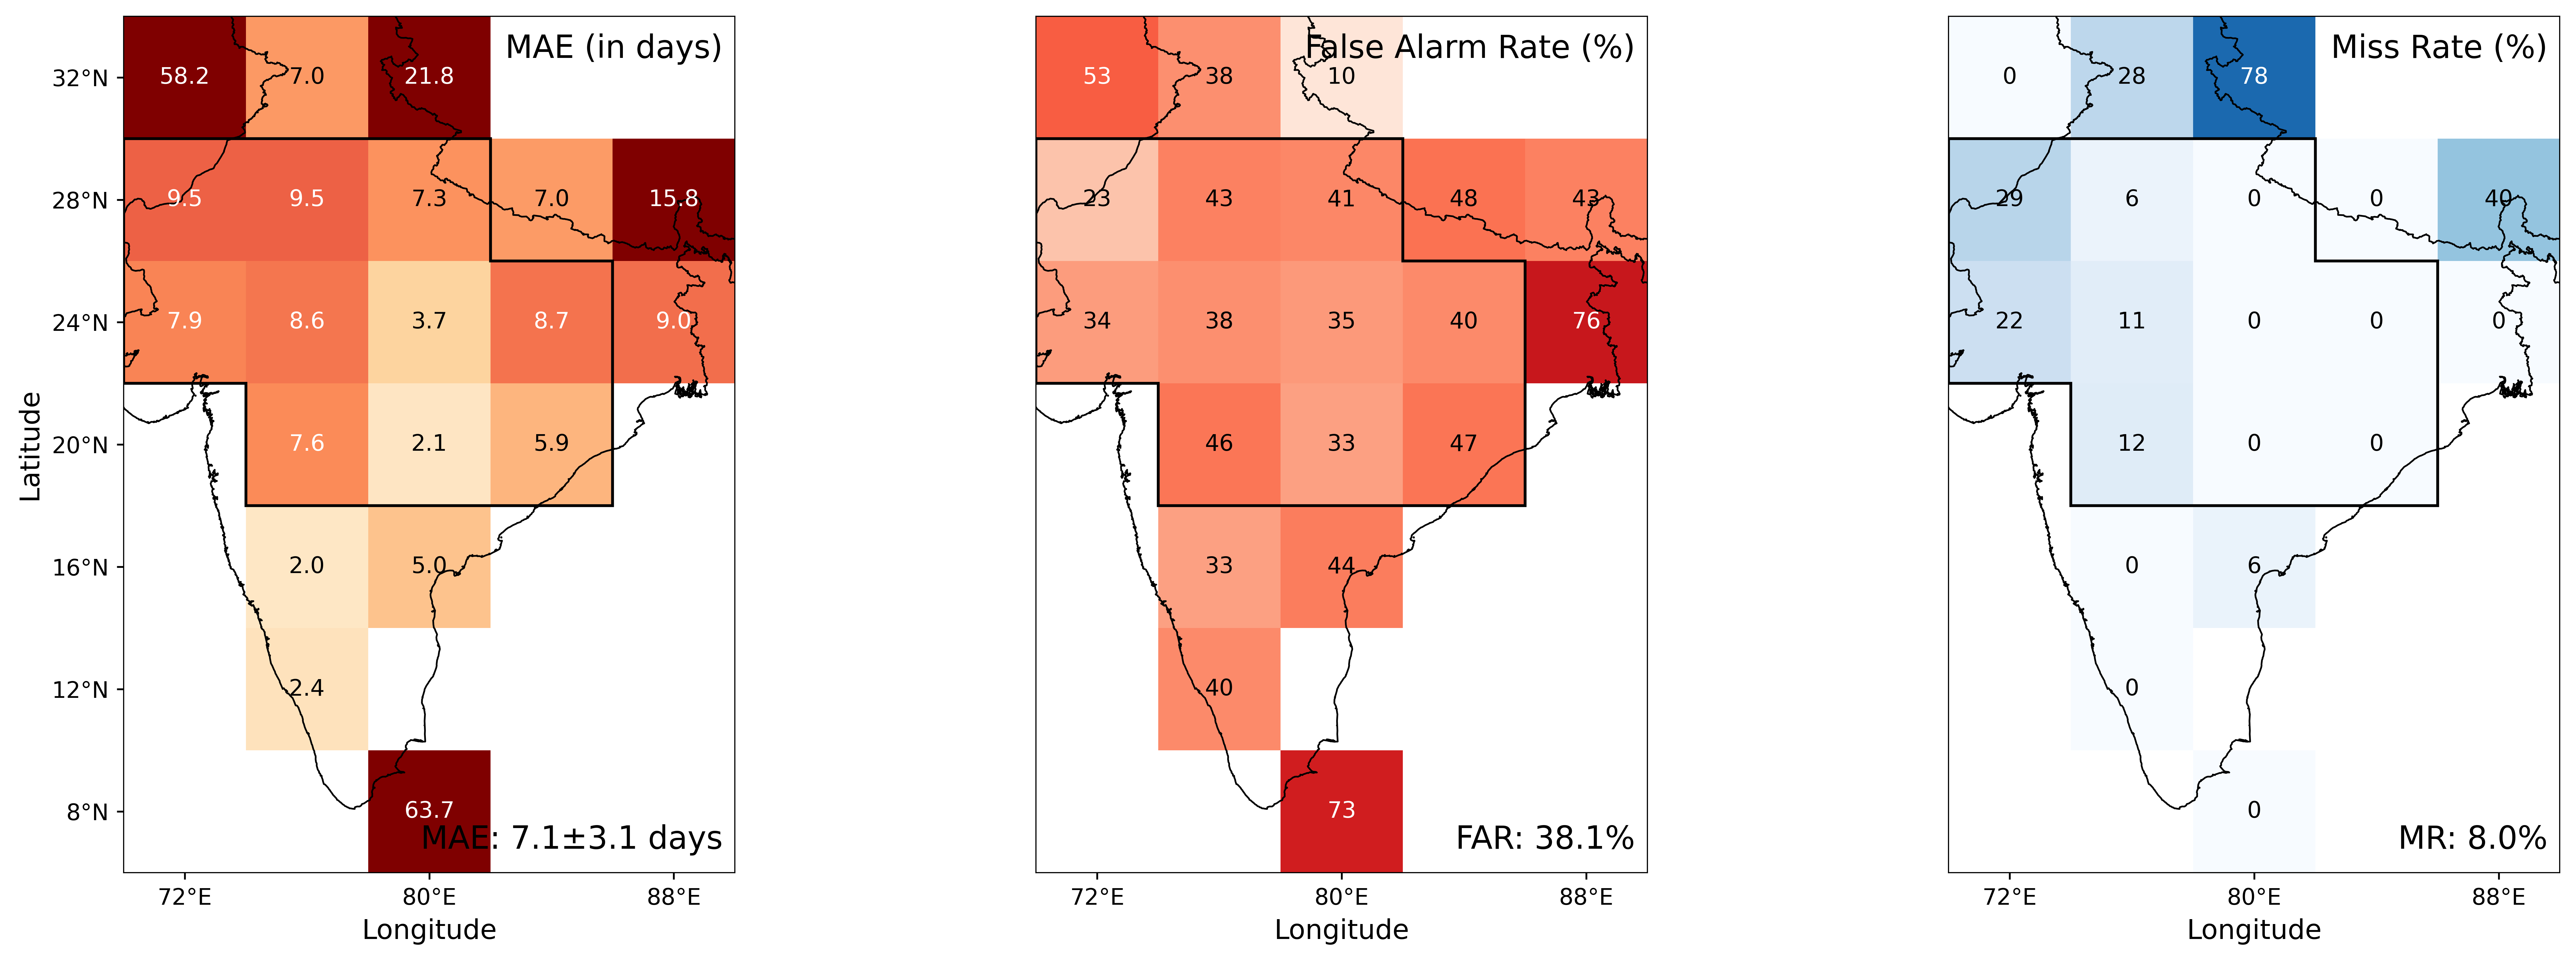

In [30]:
print("\n\nforecast window ", "-".join(map(str, window[1])), "days \n\n")
fig_filename = base_dir.joinpath(dir_fig, f'spatial_metrics_{model_name}_{"-".join(map(str, window[1]))}.png')
display(Image(filename=fig_filename, width=800))